In [59]:
#Loading the Librerys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('SBI_Life_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [61]:
#finding the shape of the dataset
df.shape

(1338, 8)

In [62]:
#finding the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [63]:
#finding the columns/keys of the dataset
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [64]:
#finding the data types which are incuding in dataset
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [65]:
df=pd.DataFrame(data=df)
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [66]:
#describe the matrics
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [67]:
#finding the co-relation of the dataset and all the diagonal values are same value
dfcor=df.corr()
dfcor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [68]:
#Lets Check the null value

df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

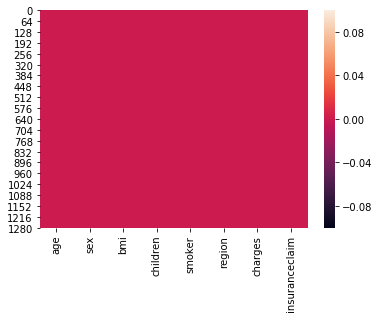

In [69]:
#Checking/retreviewing the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

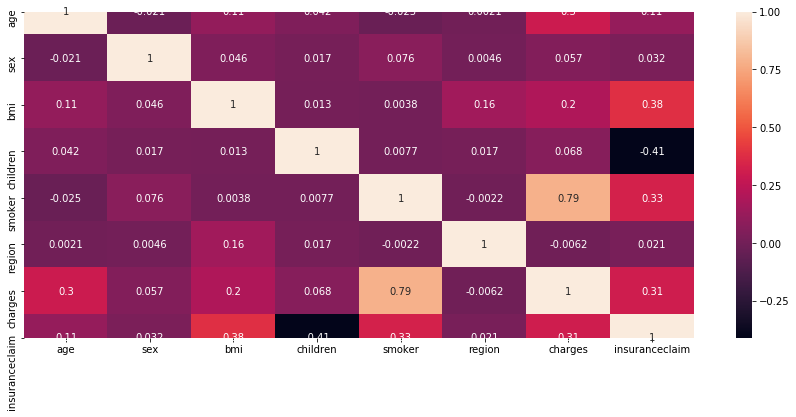

In [19]:
#finding the corelation data retriviewing in heatmap
plt.figure(figsize=(15,6))
sns.heatmap(dfcor, color="Blue", annot=True)

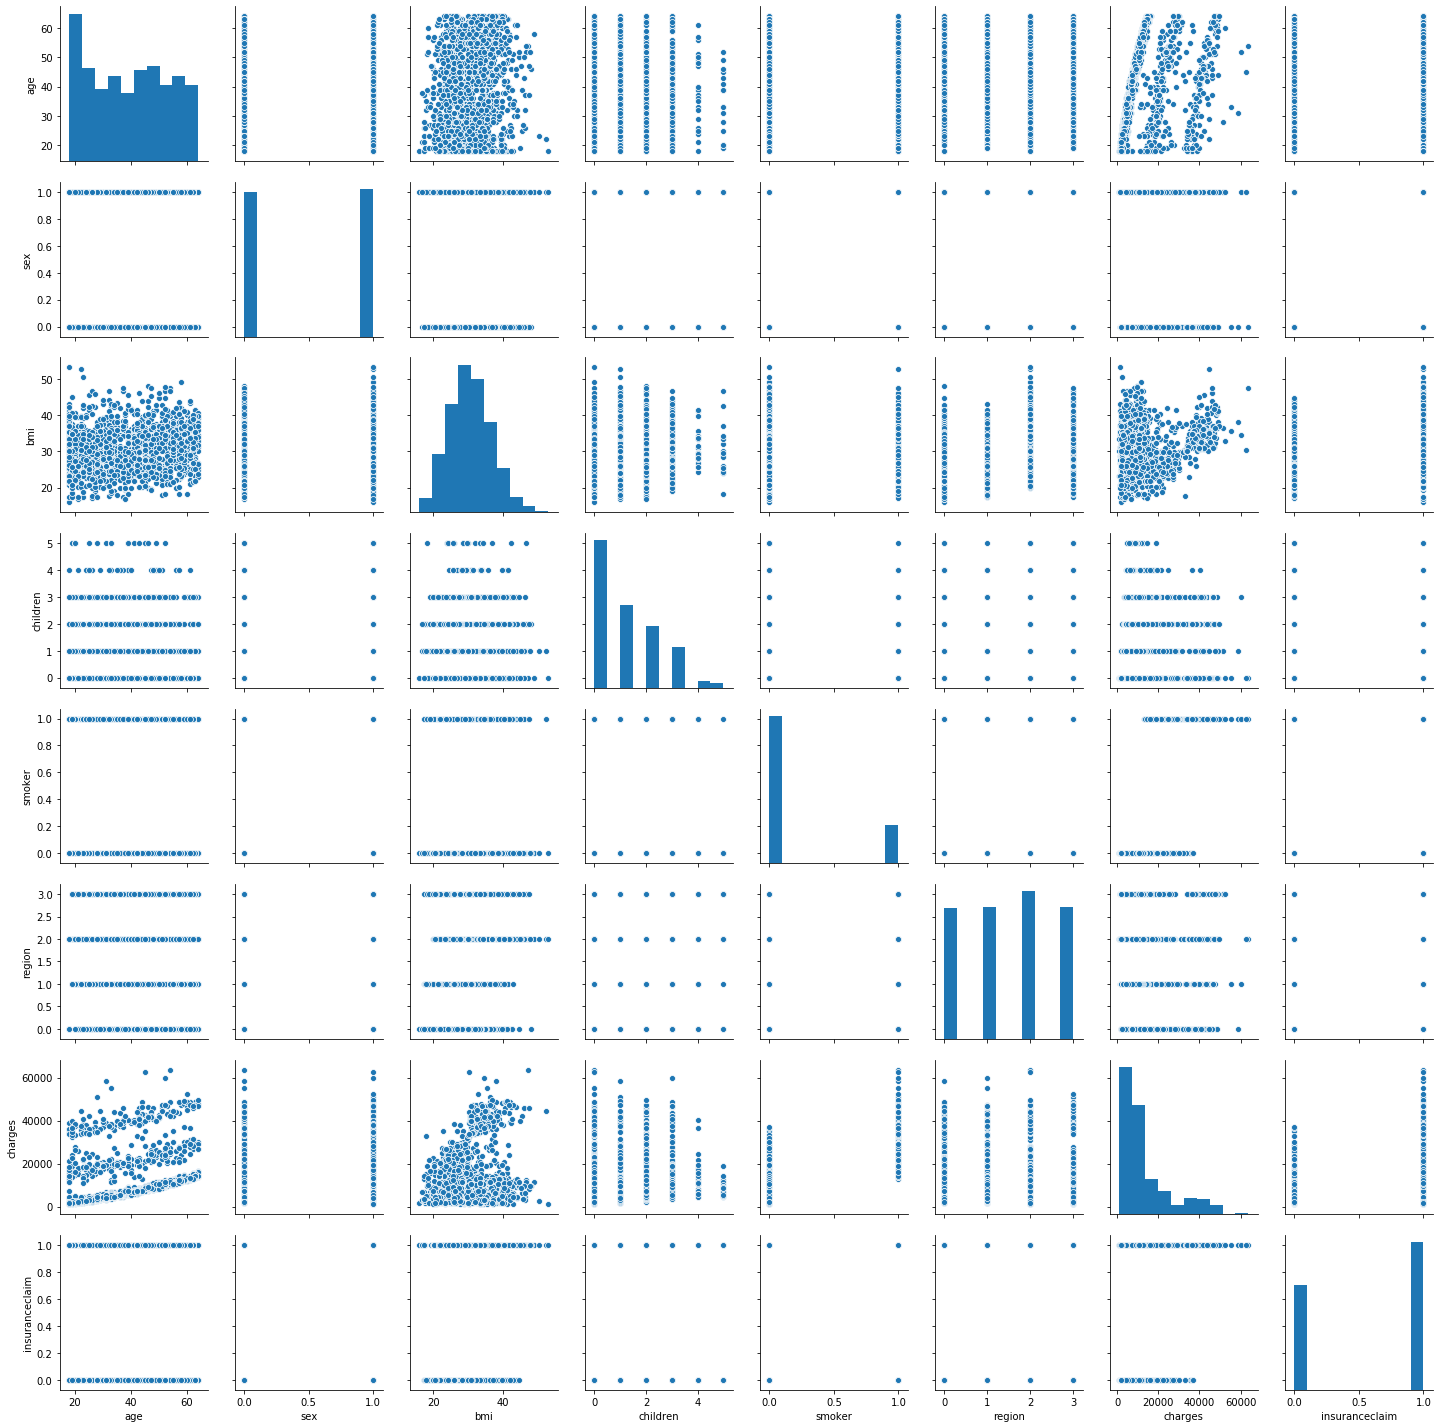

In [70]:
#by using the pairplot 
sns.pairplot(df)

In [73]:
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#Treating the skewness using log
import numpy as np
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
        
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

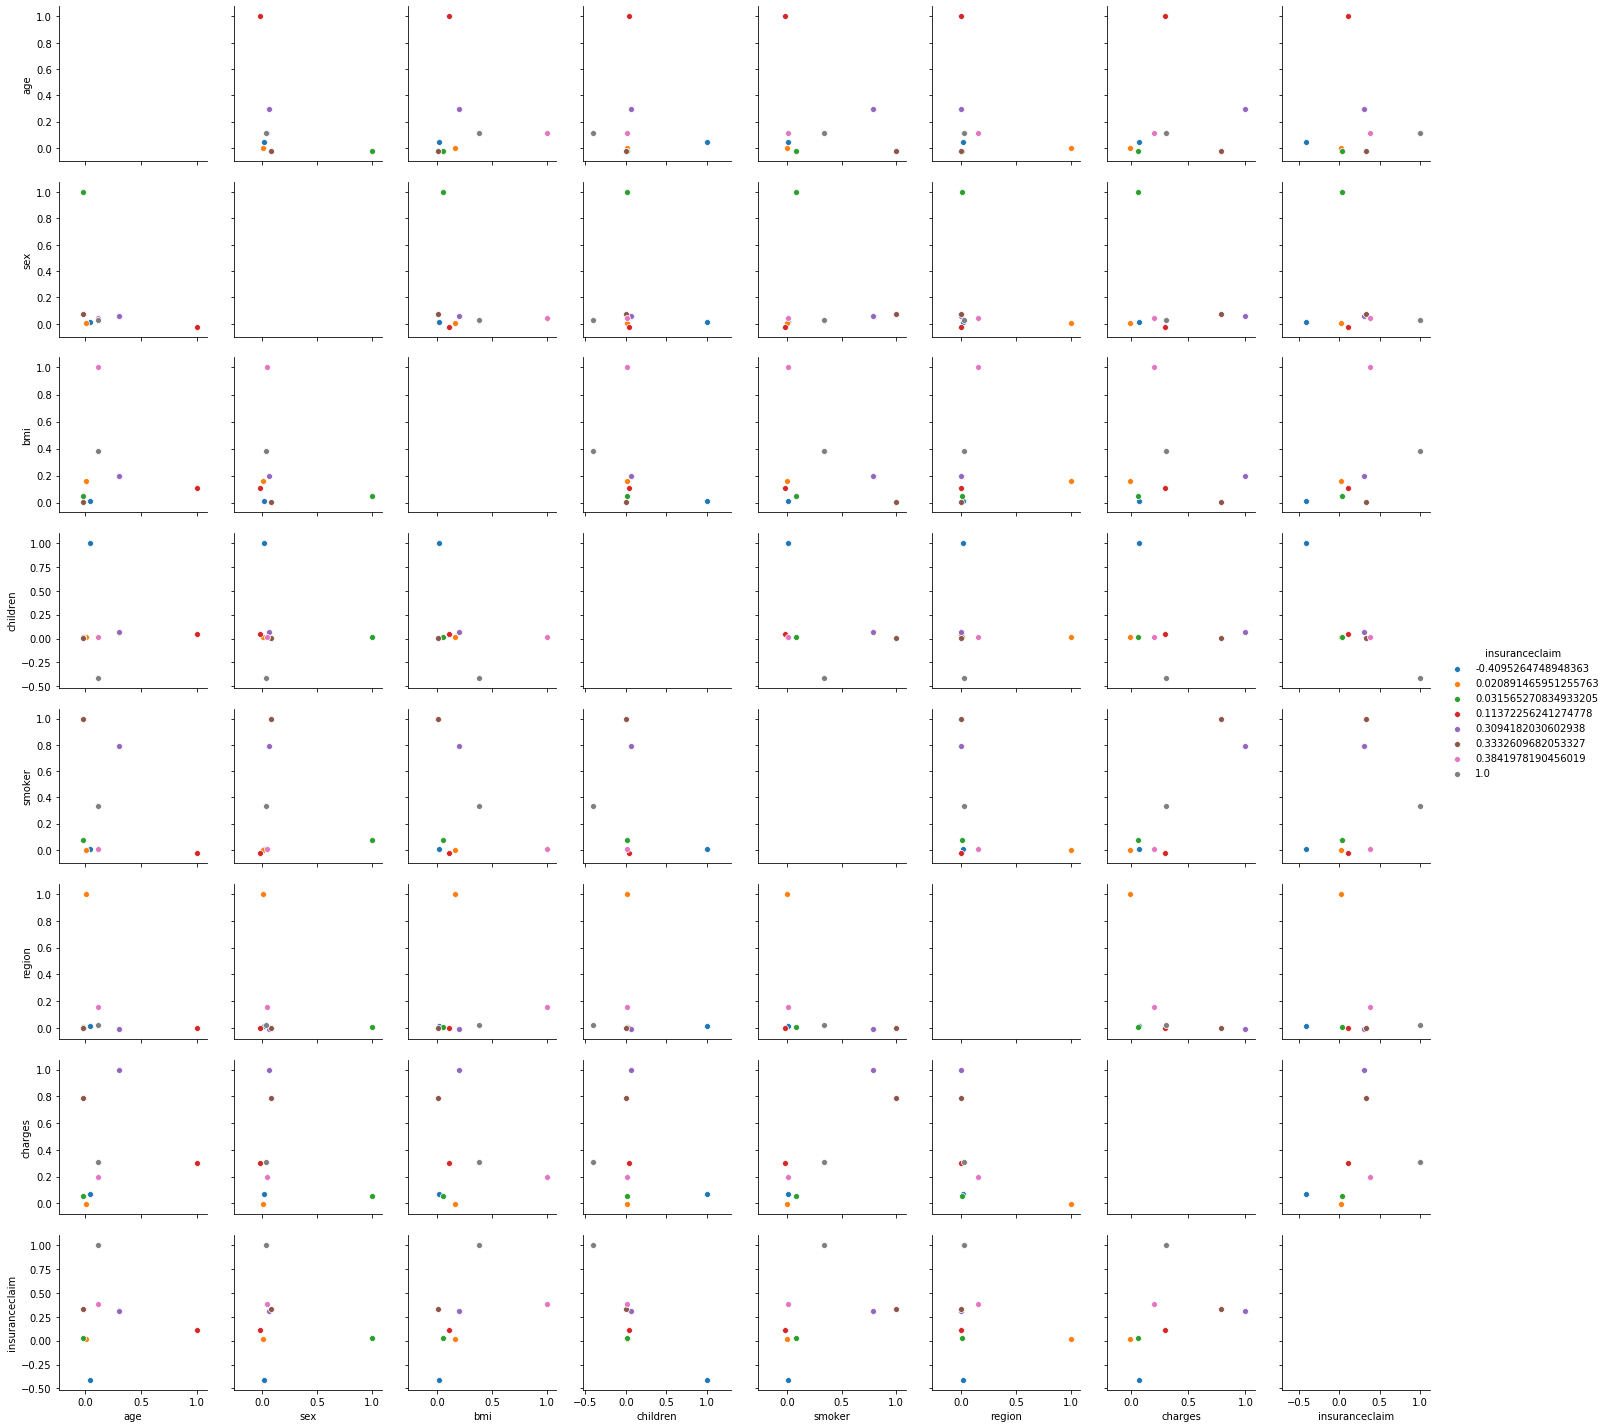

In [21]:
#pairplot defining for cor
sns.pairplot(dfcor, hue="insuranceclaim" )

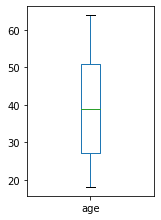

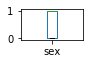

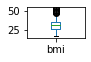

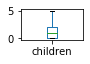

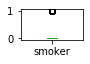

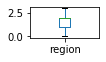

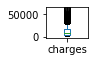

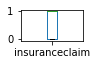

In [22]:
#Plotting boxplot through Iteration
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

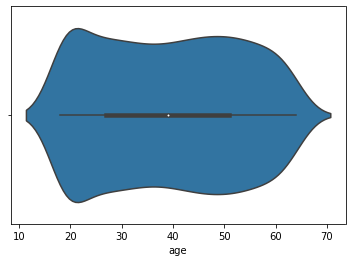

In [23]:
#ploting the graph through violinplot
sns.violinplot(x="age",data=df)

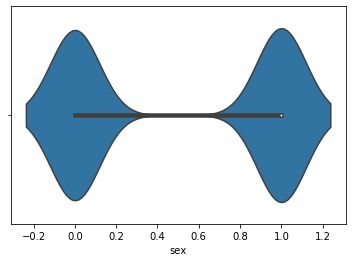

In [24]:
sns.violinplot(x="sex",data=df)

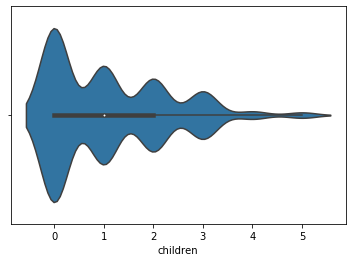

In [25]:
sns.violinplot(x="children",data=df)

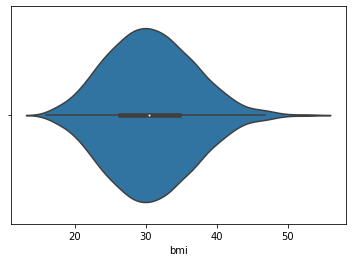

In [26]:
sns.violinplot(x="bmi",data=df)

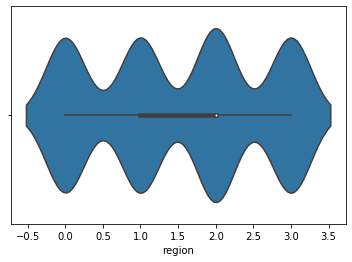

In [27]:
sns.violinplot(x="region", data=df)

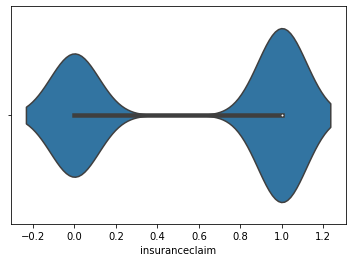

In [28]:

sns.violinplot(x="insuranceclaim", data=df)

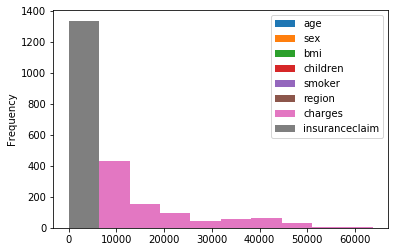

In [29]:
#histographic representation of dataset
df.plot.hist()

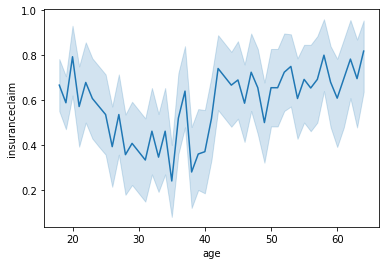

In [31]:
#line plot

sns.lineplot(df["age"],df["insuranceclaim"])
plt.show()

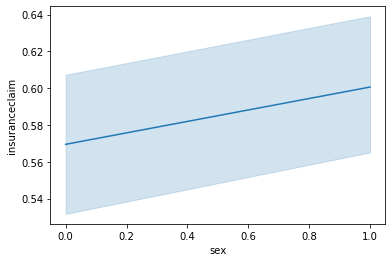

In [32]:
sns.lineplot(df["sex"],df["insuranceclaim"])
plt.show()

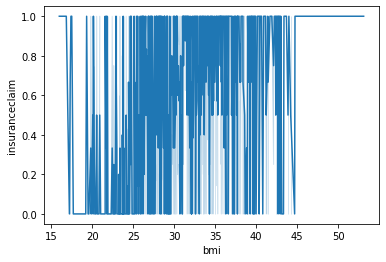

In [33]:
sns.lineplot(df["bmi"],df["insuranceclaim"])
plt.show()

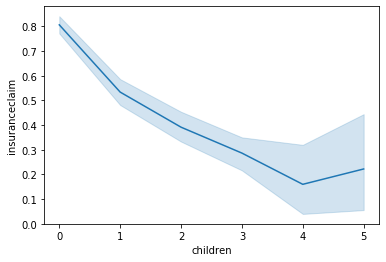

In [34]:
sns.lineplot(df["children"],df["insuranceclaim"])
plt.show()

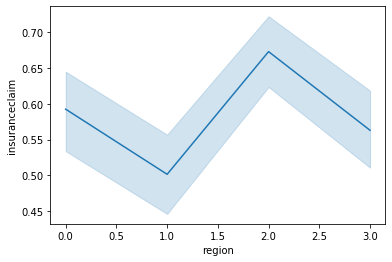

In [35]:
sns.lineplot(df["region"],df["insuranceclaim"])
plt.show()

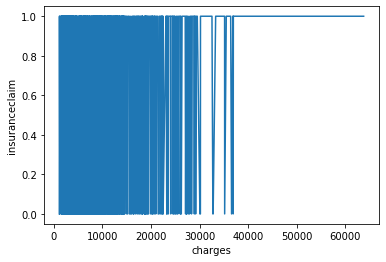

In [36]:
sns.lineplot(df["charges"],df["insuranceclaim"])
plt.show()

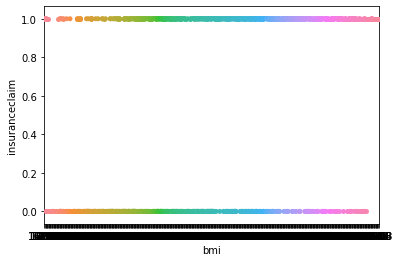

In [38]:
ax=sns.stripplot(x='bmi',y="insuranceclaim",data=df);

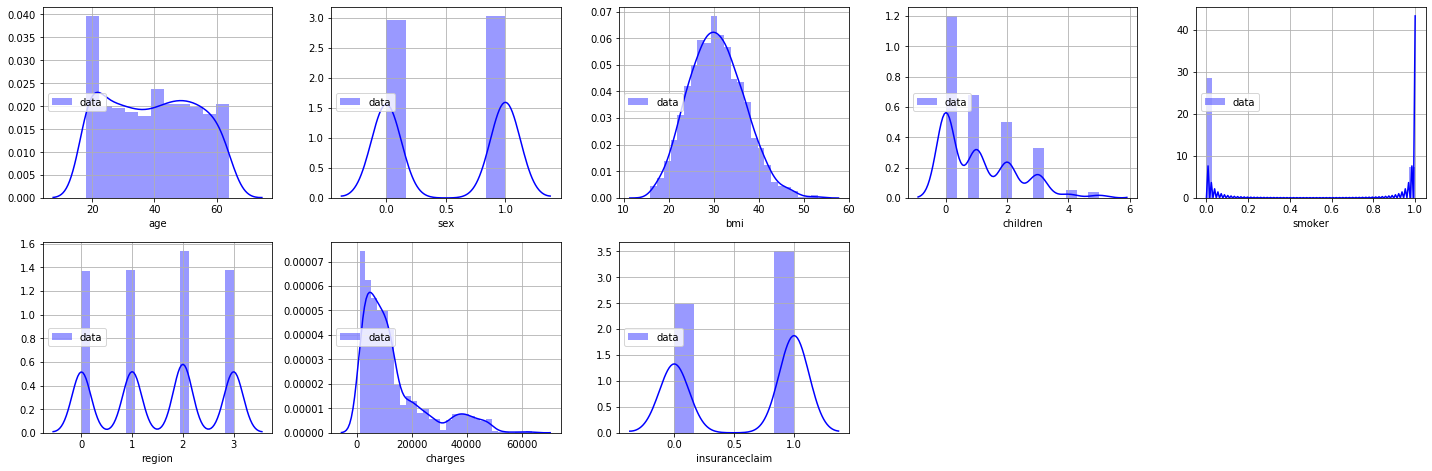

In [39]:
#Disti plot through iteration

plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='b',kde=True,label='data')
    plt.grid()
    plt.legend(loc='center left')
    plt.tight_layout()

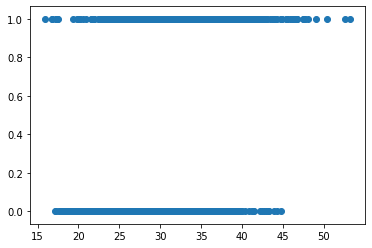

In [41]:
#scatter plot

plt.scatter(df['bmi'],df['insuranceclaim'])

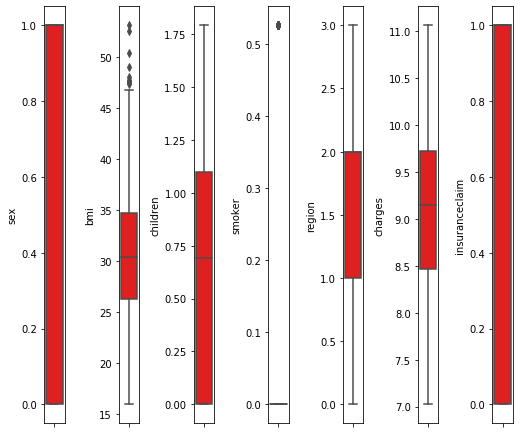

In [74]:
#column Plot
collist = df.columns.values
ncols=12
nrows=10
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

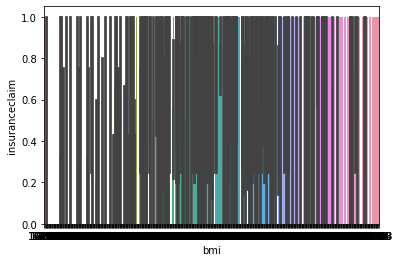

In [43]:
sns.barplot(df["bmi"], df["insuranceclaim"])

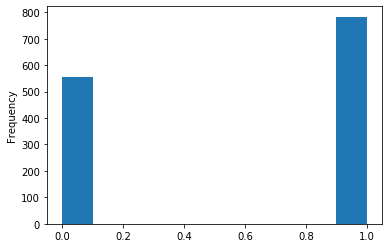

In [45]:
df['insuranceclaim'].plot.hist()

In [77]:
#finding the skewness
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [79]:
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#Treating the skewness using log
import numpy as np
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [80]:
#Let's Drop sex and region Column due to Low Correlation with insuranceclaim
df.drop('sex',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df

,age,bmi,children,smoker,charges,insuranceclaim
0,19,27.900,0.000000,0.352793,9.734236,1
1,18,33.770,0.693147,0.000000,7.453882,1
2,28,33.000,1.386294,0.000000,8.400763,0
3,33,22.705,0.000000,0.000000,9.998137,0
4,32,28.880,0.000000,0.000000,8.260455,1
...,...,...,...,...,...,...
1333,50,30.970,1.386294,0.000000,9.268755,0
1334,18,31.920,0.000000,0.000000,7.699381,1
1335,18,36.850,0.000000,0.000000,7.396847,1
1336,21,25.800,0.000000,0.000000,7.605365,0


In [81]:
#Note:: Here we found that there is a negative correlation between children and insurance claim and that is -0.424927. Here chidren represents number of children of the dependent or policy holder. Hence I have decided to drop that column 
#since it will not going to be useful for further analysis.

df.drop('children',axis=1,inplace=True)
df

,age,bmi,smoker,charges,insuranceclaim
0,19,27.900,0.352793,9.734236,1
1,18,33.770,0.000000,7.453882,1
2,28,33.000,0.000000,8.400763,0
3,33,22.705,0.000000,9.998137,0
4,32,28.880,0.000000,8.260455,1
...,...,...,...,...,...
1333,50,30.970,0.000000,9.268755,0
1334,18,31.920,0.000000,7.699381,1
1335,18,36.850,0.000000,7.396847,1
1336,21,25.800,0.000000,7.605365,0


In [83]:
#finding the outliers of the dataset

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (1338, 5)
df1.shape: (1334, 5)
z value is: [[1.43876426 0.45332    1.97058663 0.69138533 0.84190989]
 [1.50996545 0.5096211  0.5074631  1.78986137 0.84190989]
 [0.79795355 0.38330685 0.5074631  0.75956237 1.18777557]
 ...
 [1.50996545 1.0148781  0.5074631  1.85192132 0.84190989]
 [1.29636188 0.79781341 0.5074631  1.62503295 1.18777557]
 [1.55168573 0.26138796 1.97058663 1.2851735  0.84190989]]


In [85]:
#lets find/seperate the X and Y value to predict the data

X = df.drop("insuranceclaim", axis=1)
X

,age,bmi,smoker,charges
0,19,27.900,0.352793,9.734236
1,18,33.770,0.000000,7.453882
2,28,33.000,0.000000,8.400763
3,33,22.705,0.000000,9.998137
4,32,28.880,0.000000,8.260455
...,...,...,...,...
1333,50,30.970,0.000000,9.268755
1334,18,31.920,0.000000,7.699381
1335,18,36.850,0.000000,7.396847
1336,21,25.800,0.000000,7.605365


In [86]:
Y = df["insuranceclaim"]
Y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [87]:
X.shape

(1338, 4)

In [89]:
Y.shape  #empty space represents the 1 column

(1338,)

In [90]:
Y = Y.values.reshape(-1,1)
Y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [91]:
Y.shape

(1338, 1)

In [92]:
#applying the train_test_split

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [93]:
train_X.shape

(1043, 4)

In [94]:
test_X.shape

(295, 4)

In [95]:
train_Y.shape

(1043, 1)

In [96]:
test_Y.shape

(295, 1)

In [108]:
#Applying Logistic Regression

lg=LogisticRegression()

In [109]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
pred=lg.predict(test_X)
print(pred)

[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1]


In [116]:
print("accuracy score:",accuracy_score(pred,test_Y))
print("confusion_matrix:\n",confusion_matrix(test_Y,pred))
print("\n")
print("classification_report:\n",classification_report(test_Y,pred))

accuracy score: 0.7389830508474576
confusion_matrix:
 [[ 77  50]
 [ 27 141]]


classification_report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       127
           1       0.74      0.84      0.79       168

    accuracy                           0.74       295
   macro avg       0.74      0.72      0.73       295
weighted avg       0.74      0.74      0.73       295



In [119]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the Result
from sklearn.model_selection import cross_val_score
cvlg1 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(cvlg1)

print("\n")

cvlg2 = cross_val_score(lg,X,Y,cv=20,scoring='accuracy').mean()
print(cvlg2)

0.7467166042446942


0.7452077846063798


In [123]:
#Grid Search Cross Validation for Logistic Regression

from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=15)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best arameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)


lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

tuned hpyerparameters :(best arameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.7535953978907
score 0.7389830508474576


In [127]:
#lets Boost the Dataset by AdaBoost and GradiantBoost classifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(train_X,train_Y)
print("adascore:",ad.score(train_X,train_Y))
abpred=ad.predict(test_X)
print("abpred:",abpred)
ad.score(test_X,test_Y)

adascore: 0.8312559923298178
abpred: [0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1]


0.752542372881356

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_X,train_Y)
print(gb.score(train_X,train_Y))
abpred=gb.predict(test_X)
print(abpred)
gb.score(test_X,test_Y)

0.8983700862895494
[0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1]


0.7966101694915254

In [129]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit the regression model

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6658464856099466
R2 sq:  0.6658464856099466
Mean squared error: 0.14
Test Variance score: 0.42


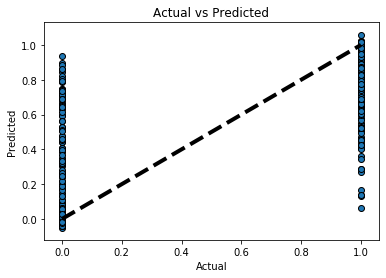

In [131]:
#Lets Visualize the Goodness of the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [133]:
#Prediction Using Naive Bayes Algorithm
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print("accuracy_score :",accuracy_score(test_Y,predmb))
print("\n")
print("confusion_matrix:\n",confusion_matrix(test_Y,predmb))
print("\n")
print("classification_report:",classification_report(test_Y,predmb))


accuracy_score : 0.6033898305084746


confusion_matrix:
 [[ 30  97]
 [ 20 148]]


classification_report:               precision    recall  f1-score   support

           0       0.60      0.24      0.34       127
           1       0.60      0.88      0.72       168

    accuracy                           0.60       295
   macro avg       0.60      0.56      0.53       295
weighted avg       0.60      0.60      0.55       295



In [135]:
#using the multinomial NB algr by using Crossval Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score is:',score)
print("\n")
print('Mean Score:',score.mean())
print("\n")
print('std deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)
print("\n")
print('Y_Prediction_values:',y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat


Score is: [0.62222222 0.54444444 0.62222222 0.5505618  0.60674157 0.62921348
 0.56179775 0.6741573  0.53932584 0.60674157 0.60674157 0.64044944
 0.53932584 0.64044944 0.53932584]


Mean Score: 0.5949146899708697


std deviation 0.04350874991799699


Y_Prediction_values: [1 1 1 ... 1 1 1]


array([[166, 389],
       [156, 627]], dtype=int64)

In [140]:
#Pediction using Support Vector Machine(svm)
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print("accuracy_score :",accuracy_score(test_Y,predsvc))
print('\n')
print("confusion_matrix:\n",confusion_matrix(test_Y,predsvc))
print('\n')
print("classification_report:",classification_report(test_Y,predsvc))

accuracy_score : 0.7288135593220338


confusion_matrix:
 [[ 78  49]
 [ 31 137]]


classification_report:               precision    recall  f1-score   support

           0       0.72      0.61      0.66       127
           1       0.74      0.82      0.77       168

    accuracy                           0.73       295
   macro avg       0.73      0.71      0.72       295
weighted avg       0.73      0.73      0.73       295



In [142]:
# by using Cross-val Score to Support Vector Machine
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score:',score)
print('\n')
print('Mean Score:',score.mean())
print('\n')
print('std Deviation',score.std())
print('\n')

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values:',y_pred)


conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score: [0.74253731 0.76119403 0.74253731 0.73033708 0.75280899]


Mean Score: 0.7458829448264297


std Deviation 0.010454280111172531


Y Prediction values: [1 1 1 ... 1 0 1]


0.7458893871449925

In [143]:
#GridSearchCV for Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.589, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.589, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.724, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.715, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.701, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.697, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.589, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [144]:
# the best parameters found by GridSearchCV in the best_params_ attribute, the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [145]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       127
           1       0.77      0.85      0.81       168

    accuracy                           0.77       295
   macro avg       0.77      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295



In [146]:
#Boosting through Support Vector Classifier
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.5694915254237288


In [158]:
#Prediction Using KNN Nearest Neighbor
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print("accuracy_score :",accuracy_score(test_Y,predknn))
print('\n')
print("confusion_matrix:\n",confusion_matrix(test_Y,predknn))
print('\n')
print("classification_report:\n",classification_report(test_Y,predknn))

accuracy_score : 0.6711864406779661


confusion_matrix:
 [[ 76  51]
 [ 46 122]]


classification_report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       127
           1       0.71      0.73      0.72       168

    accuracy                           0.67       295
   macro avg       0.66      0.66      0.66       295
weighted avg       0.67      0.67      0.67       295



In [160]:
#KNN Nearest Neighbor by using Crossval Score
kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print("\n")
print('Mean Score:',score.mean())
print('std Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values:',y_pred)


print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.74074074 0.68888889 0.75555556 0.70895522 0.7238806  0.70676692
 0.7518797  0.71428571 0.73684211 0.69924812]


Mean Score: 0.7227043562471683
std Deviation 0.0215976099639689
Y Prediction values: [1 1 0 ... 1 0 1]
y_pred.shape (1338,)


array([[374, 181],
       [192, 591]], dtype=int64)

In [162]:
#Use GridSearchCV for KNN Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# search for an optimal value of K for KNN

# list of integers 1 to 30 we will try
k_range = range(1, 31)
k_scores = []
# list of scores from k_range


# 1. we will loop through reasonable values of k
for k in k_range:# run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)#obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print("k_score values:",k_scores)

k_score values: [0.7045759984352218, 0.6778080657206871, 0.7373727728582098, 0.7027358725416978, 0.7209693623528575, 0.7296138731818342, 0.7363920302997973, 0.7295772431452042, 0.7296609054376044, 0.72483418684875, 0.7277376506988158, 0.7344034282869234, 0.7478753689676021, 0.745841512856076, 0.7478663892741563, 0.7392116540417512, 0.7468865357943028, 0.740145897791529, 0.7429847256303568, 0.7449261175717486, 0.7487638251715921, 0.7430585191507522, 0.7478204239126569, 0.7458784985241296, 0.7487634695401686, 0.7478295814218144, 0.7526561221949571, 0.7478663892741563, 0.7545791991180341, 0.747884882108183]


In [164]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)
print("\n")

# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [166]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=11, scoring='accuracy')
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=11, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [167]:
# the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 29}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')


In [168]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       127
           1       0.73      0.83      0.77       168

    accuracy                           0.73       295
   macro avg       0.72      0.71      0.71       295
weighted avg       0.72      0.73      0.72       295



In [171]:
#Bagging of KNN Nearest Neighbor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggingknn.fit(train_X, train_Y)



BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [172]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [174]:
from sklearn.metrics import accuracy_score
print("accuracy_score:",accuracy_score(test_Y,predictions))

confusion_matrix(test_Y, predictions)

accuracy_score: 0.7186440677966102


array([[ 73,  54],
       [ 29, 139]], dtype=int64)

In [175]:
#Prediction Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print("accuracy_score :",accuracy_score(test_Y,preddtc))
print('\n')
print("confusion_matrix:\n",confusion_matrix(test_Y,preddtc))
print('\n')
print("classification_report:",classification_report(test_Y,preddtc))

accuracy_score : 0.8033898305084746


confusion_matrix:
 [[ 96  31]
 [ 27 141]]


classification_report:               precision    recall  f1-score   support

           0       0.78      0.76      0.77       127
           1       0.82      0.84      0.83       168

    accuracy                           0.80       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.80      0.80      0.80       295



In [176]:
#DecisionTreeClassifier by using Crossval Score
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Score:',score.mean())
print('std Deviation:',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values:',y_pred)


conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.79775933 0.75417355 0.7847019  0.83038808 0.81308131]
Mean Score: 0.7960208330582175
std Deviation: 0.02590175112852761
Y Prediction values: [1 0 1 ... 1 0 1]


array([[431, 124],
       [137, 646]], dtype=int64)

In [177]:
#Using GridSearchCV for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [178]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 72, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=72,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [179]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       127
           1       0.79      0.87      0.83       168

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [180]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [154]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.7457627118644068


array([[ 86,  41],
       [ 34, 134]], dtype=int64)

In [188]:
#Prediction Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predrf=rf.predict(test_X)
print("accuracy_score :",accuracy_score(test_Y,predrf))
print('\n')
print("confusion_matrix:\n",confusion_matrix(test_Y,predrf))
print('\n')
print("classification_report:",classification_report(test_Y,predrf))


accuracy_score : 0.8203389830508474


confusion_matrix:
 [[ 99  28]
 [ 25 143]]


classification_report:               precision    recall  f1-score   support

           0       0.80      0.78      0.79       127
           1       0.84      0.85      0.84       168

    accuracy                           0.82       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.82      0.82      0.82       295



In [189]:
#RandomForestClassifier Using Cross_Val_Score

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('std Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.83703704 0.8        0.78518519 0.82089552 0.8358209  0.84210526
 0.86466165 0.83458647 0.81203008 0.81203008]
Mean Scores 0.8244352173967255
std Deviation 0.02186283040025883
Y Prediction values
[1 1 0 ... 1 0 1]
y_pred.shape (1338,)


array([[439, 116],
       [131, 652]], dtype=int64)

In [190]:
#Using GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [191]:
# the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [196]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 


              precision    recall  f1-score   support

           0       0.82      0.73      0.78       127
           1       0.81      0.88      0.85       168

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [197]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [198]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.7491525423728813


In [200]:
confusion_matrix(test_Y, predictionsrf)

array([[ 84,  43],
       [ 31, 137]], dtype=int64)

In [202]:
#among all the models rf gives high accuracy (82) am saving this model

In [203]:
df=pd.DataFrame(pred)
df.to_csv('SBI_Life.csv')

In [204]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(rf,'SBI_Life_pre.pkl')

['SBI_Life_pre.pkl']